In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_26800\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [15]:
df[500000:]

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
500000,Консультант SAP XI,NaN,NaN,NaN,NaN,Москва,2012-02-24T13:31:30+0400
500001,Администратор проекта,NaN,NaN,NaN,NaN,Москва,2012-02-24T13:31:59+0400
500002,Java developer,NaN,NaN,NaN,NaN,Самара,2012-02-24T13:32:57+0400
500003,Консультант в проектах внедрения бизнес-прилож...,NaN,NaN,NaN,NaN,Москва,2012-02-24T13:33:43+0400
500004,Ведущий инженер OSS (fault management),NaN,NaN,NaN,NaN,Москва,2012-02-24T13:35:39+0400
...,...,...,...,...,...,...,...
6332707,Ведущий специалист по сопровождению SIEM платф...,SIEM\nPython\nLinux\nИнформационная безопасность,NaN,300000.0,RUR,Москва,2023-12-09T20:35:54+0300
6332708,PHP-программист,MySQL\nPHP\nPostgreSQL\nHTML\nJavaScript\njQue...,NaN,NaN,NaN,Гомель,2023-12-09T20:48:22+0300
6332709,Motion designer,Adobe After Effect\nОбработка видео\nАнимация\...,400.0,2000.0,EUR,Санкт-Петербург,2023-12-09T21:34:51+0300
6332710,Дизайнер интерьеров,3D Моделирование\nпунктуальность\nArchiCAD\nSk...,NaN,NaN,NaN,Тамбов,2023-12-09T21:47:33+0300


In [16]:
df.dropna(subset=['key_skills'],inplace=True)

In [17]:
df.insert(6, "year", df.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [24]:
years = df['year'].unique()

In [19]:
df_group_year = df.groupby(by="year")

In [20]:
from collections import Counter


In [23]:
key_skills = df_group_year.get_group('2015')['key_skills'].to_list()

skills = '\n'.join(key_skills).replace('\r','').split('\n')

count_skills = Counter(skills).most_common()[:20]

dict_skills = {k: v for k,v in count_skills}

print(dict_skills)

{'JavaScript': 6702, 'ООП': 5146, 'jQuery': 5121, 'HTML5': 5003, 'HTML': 3791, 'C#': 3439, 'MVC': 3147, '.NET Framework': 3116, 'CSS': 3015, 'ASP.NET': 2998, 'PHP': 2765, 'Git': 2528, 'Ведение переговоров': 2434, 'MySQL': 2430, 'Java': 2312, 'SQL': 2148, 'Управление проектами': 1977, 'Поиск и привлечение клиентов': 1868, 'CSS3': 1807, 'Английский язык': 1732}


In [25]:
all_years_dict = {}

for year in years:
    key_skills = df_group_year.get_group(year)['key_skills'].to_list()
    skills = '\n'.join(key_skills).replace('\r','').split('\n')
    count_skills = Counter(skills).most_common()[:20]
    dict_skills = {k: v for k,v in count_skills}
    all_years_dict[year] = dict_skills


In [26]:
all_years_dict

{'2015': {'JavaScript': 6702,
  'ООП': 5146,
  'jQuery': 5121,
  'HTML5': 5003,
  'HTML': 3791,
  'C#': 3439,
  'MVC': 3147,
  '.NET Framework': 3116,
  'CSS': 3015,
  'ASP.NET': 2998,
  'PHP': 2765,
  'Git': 2528,
  'Ведение переговоров': 2434,
  'MySQL': 2430,
  'Java': 2312,
  'SQL': 2148,
  'Управление проектами': 1977,
  'Поиск и привлечение клиентов': 1868,
  'CSS3': 1807,
  'Английский язык': 1732},
 '2016': {'JavaScript': 13481,
  'HTML': 9790,
  'PHP': 8995,
  'Git': 8450,
  'Ведение переговоров': 8407,
  'CSS': 8136,
  'jQuery': 7684,
  'MySQL': 7591,
  'Работа в команде': 7109,
  'HTML5': 6756,
  'Пользователь ПК': 6727,
  'SQL': 6567,
  'Java': 6431,
  'Управление проектами': 6358,
  'ООП': 6024,
  'Грамотная речь': 5500,
  'CSS3': 5356,
  'Поиск и привлечение клиентов': 5286,
  'Навыки продаж': 5123,
  'Активные продажи': 5051},
 '2017': {'JavaScript': 20170,
  'HTML': 14485,
  'PHP': 12682,
  'CSS': 12672,
  'Git': 12584,
  'MySQL': 11175,
  'Ведение переговоров': 10196,


Graphic skills by year

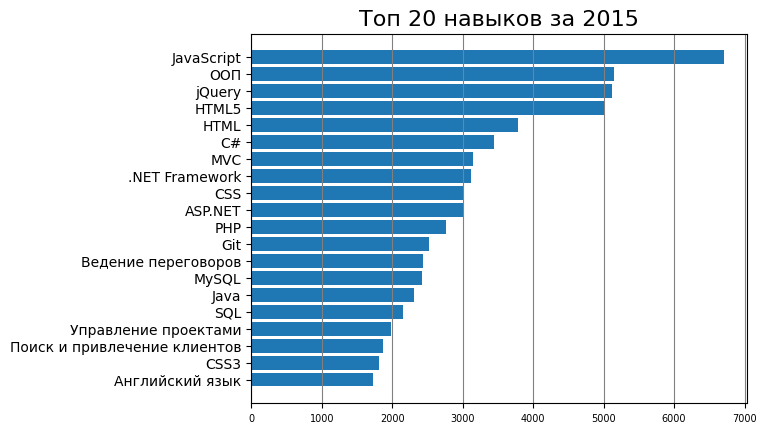

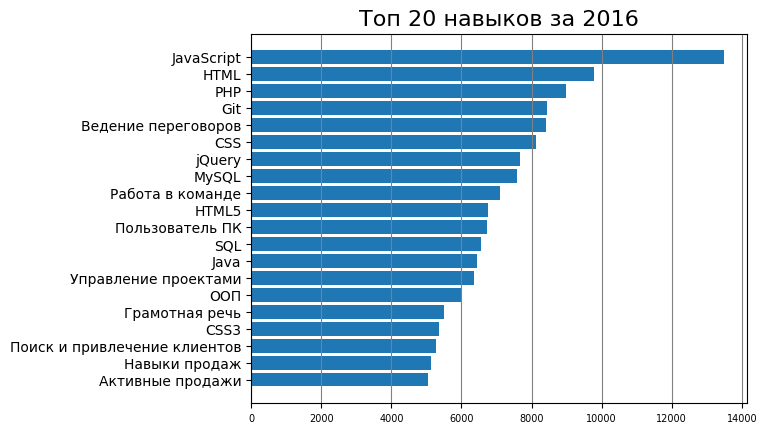

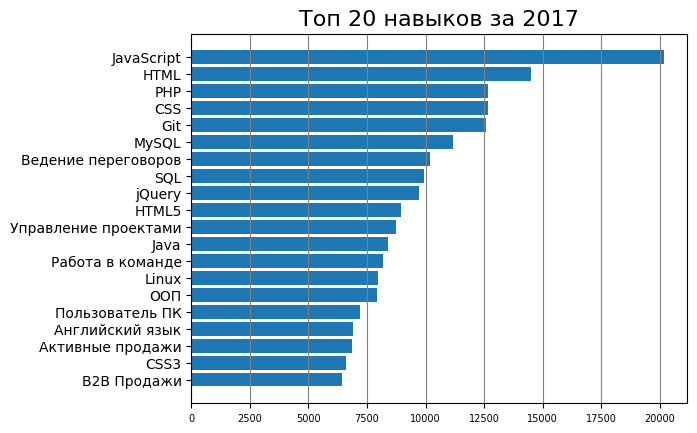

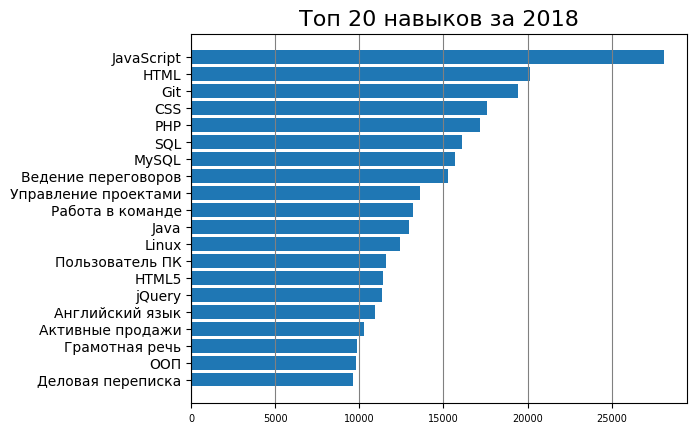

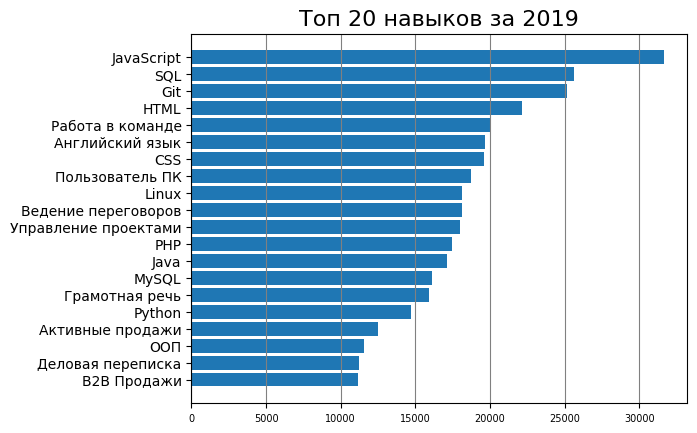

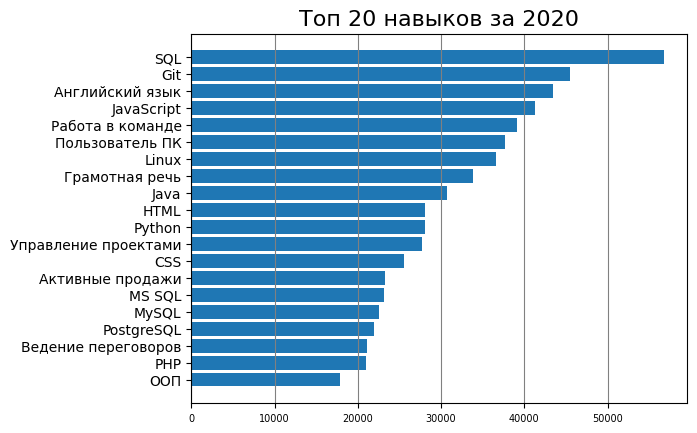

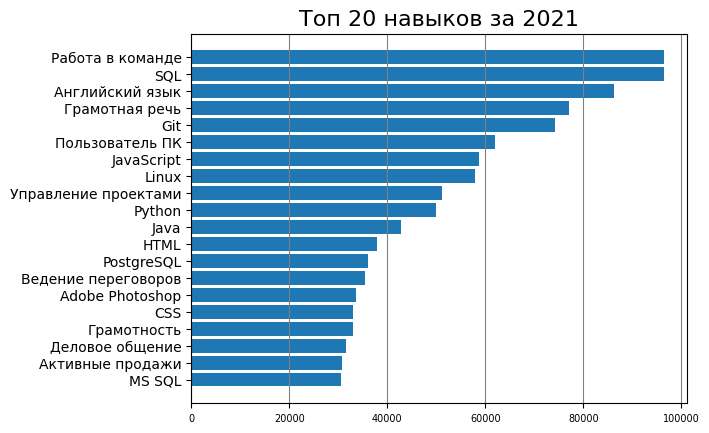

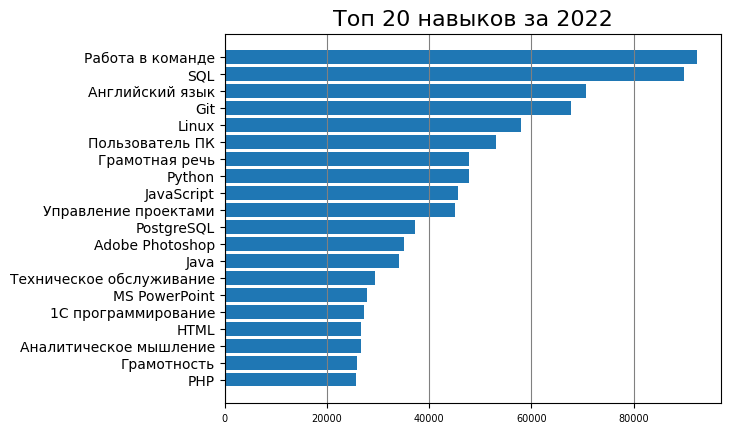

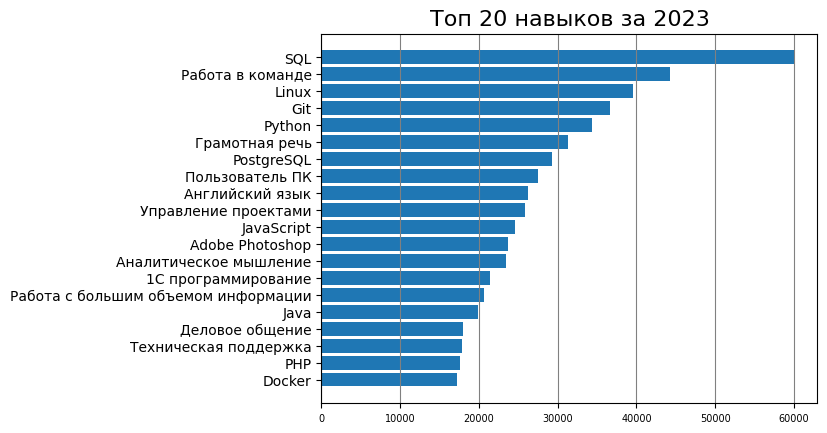

In [40]:
for year in years:
    plt.barh(list(all_years_dict[year].keys()),list(all_years_dict[year].values()))
    plt.xticks(rotation=0, size=7)
    plt.title(f'Топ 20 навыков за {int(year)}',size=16)
    plt.gca().invert_yaxis()
    plt.gca().xaxis.grid(color='gray')
    plt.show()  

In [43]:
{k: v for k, v in sorted(all_years_dict['2015'].items(), key=lambda kv: (-kv[1], kv[0]))}

{'JavaScript': 6702,
 'ООП': 5146,
 'jQuery': 5121,
 'HTML5': 5003,
 'HTML': 3791,
 'C#': 3439,
 'MVC': 3147,
 '.NET Framework': 3116,
 'CSS': 3015,
 'ASP.NET': 2998,
 'PHP': 2765,
 'Git': 2528,
 'Ведение переговоров': 2434,
 'MySQL': 2430,
 'Java': 2312,
 'SQL': 2148,
 'Управление проектами': 1977,
 'Поиск и привлечение клиентов': 1868,
 'CSS3': 1807,
 'Английский язык': 1732}

In [44]:
for year in years:
    dict_skills = {k: v for k, v in sorted(all_years_dict[year].items(), key=lambda kv: (-kv[1], kv[0]))}
    pd.DataFrame(list(dict_skills.items ()), columns = [f'Топ навыков за {int(year)}', 'Количество']).to_html(f'skills_all_{int(year)}.html')